# Inverse Cosserat Model

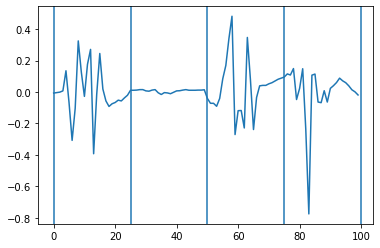

In [152]:
# Setup
import numpy as np
import json
import matplotlib.pyplot as plt
import math

# Importing data
with open("2.5N_run5.json") as json_file:
    run_data = json.load(json_file)

# Saving relevant variables
wave0 = run_data["experiment_parameters"]["wav0"]
wave_data = run_data["data"][0]["wav_data"]
illumisense_curvatures = np.array(run_data["data"][0]['curvatures'])
# [10:18]
x = np.array(wave_data)-np.array(wave0)
plt.plot(x)
plt.axvline(x=0)
plt.axvline(x=25)
plt.axvline(x=50)
plt.axvline(x=75)
plt.axvline(x=100)
# Functions
def skew_symmetric(vector):

    skew_matrix = np.zeros((3,3))

    skew_matrix = np.array([[0, -vector[2][0], vector[1][0]], 
                            [vector[2][0], 0, -vector[0][0]],
                            [-vector[1][0], vector[0][0], 0]],dtype='object')
    return skew_matrix

# Calculating Strain

### Defining Constants

In [147]:
core2coreAngle = 120 # Angle between adjacent cores (degrees)
core2centDist = 3.7e-5 # Distance from core to center (37um)
StrainSensitivity = 0.784 # DOI: 10.1007/s13320-020-0579-0 

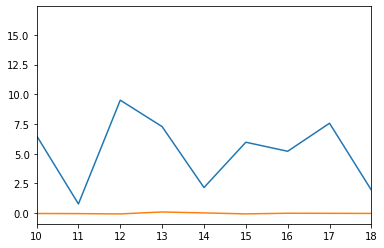

In [155]:
core2coreAngle = 120 # Angle between adjacent cores (degrees)
core2centDist = 3.7e-5 # Distance from core to center (37um)
StrainSensitivity = 0.784 # DOI: 10.1007/s13320-020-0579-0 

def single_core_strain(central_core_wave0,central_core_waves,wave0,waves,strain_sens):
    term1_num = waves - wave0
    term1_denom = strain_sens * wave0
    term2_num = central_core_waves - central_core_wave0
    term2_denom = strain_sens * central_core_wave0

    core_strain = (term1_num/term1_denom) - (term2_num/term2_denom)

    return core_strain

def get_strain(wave0,waves,strain_sens):

    change_in_strain = np.zeros((3,25))

    wave0 = np.array(wave0)
    waves = np.array(waves)

    central_core_wave0 = wave0[25:50]
    central_core_wave = waves[25:50]

    change_in_strain[0,:] = single_core_strain(central_core_wave0,central_core_wave,waves[0:25],wave0[25:50],strain_sens)
    change_in_strain[1,:] = single_core_strain(central_core_wave0,central_core_wave,waves[50:75],wave0[50:75],strain_sens)
    change_in_strain[2,:] = single_core_strain(central_core_wave0,central_core_wave,waves[75:100],wave0[75:100],strain_sens)

    return change_in_strain # 3 rows, each row is one of the cores

def get_app_curvature(strain,r):

    i_comp = 0
    j_comp = 0

    for n in range(3):
        i_comp = i_comp + (strain[n,:]/r) * np.cos(np.deg2rad(120*n))
        j_comp = j_comp + (strain[n,:]/r) * np.sin(np.deg2rad(120*n))
    
    apparent_curvatures = np.array([-i_comp,-j_comp])

    return apparent_curvatures # 2 rows, first row is i component and second row is j component

strains = get_strain(wave0,wave_data,StrainSensitivity)
apparent_curves = get_app_curvature(strains,core2centDist)

a = apparent_curves[0,:]
b = apparent_curves[1,:]

curvature = 2 / 3 * ((a*a+b*b)**0.5)

# print(a)
# print(b)
# print(curvature)
# plt.plot(1/curvature)
plt.plot(curvature)
plt.plot(illumisense_curvatures)
plt.xlim((10,18));

In [150]:
kappa = curvatures
theta_b = 

r = 

Ixx = 0.25*np.pi*(r^4)
Iyy = Ixx
Izz = 2*Ixx

J = np.diag([Ixx,Iyy,Izz])

G = 
E = 
A = np.pi*r^2

# Shear and axial stiffness matrix
Kv = np.diag([G*A,G*A,E*A])
# Bending and torsional stiffness matix
Ku = np.diag([E,E,G])*J

# From Assumptions
v_0 = [[0],[0],[1]]

u = np.zeros((3,1))
u[0] = kappa*np.cos(theta_b)
u[1] = kappa*np.sin(theta_b)

uhat = skew_symmetric(u)

SyntaxError: invalid syntax (2545350521.py, line 2)

### Equilibrium Equations

In [ ]:
dnds = -uhat*n - f;
dmds = -uhat*m - vhat*n - l;

### Constitutive Equations

In [ ]:
v = np.linalg.inv(Kv)*n + v_0
u = np.linalg.inv(Ku)*m + u_0